In [47]:
import sklearn
from sklearn import datasets

Let's begin by making an empty script.py file and then importing the breast cancer data from `sklearn`. We want to import the function `load_breast_cancer` from `sklearn.datasets`.
Once we've imported the dataset, let's load the data into a variable called `breast_cancer_data`. Do this by setting `breast_cancer_data` equal to the function `load_breast_cancer()`.

In [10]:
breast_cancer_data = datasets.load_breast_cancer()

Before jumping into creating our classifier, let's take a look at the data. Begin by printing `breast_cancer_data.data[0]`. That's the first datapoint in our set. But what do all of those numbers represent? Let's also print `breast_cancer_data.feature_names`.

In [11]:
breast_cancer_data.data[0]

array([  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
         1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
         3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
         7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
         8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
         4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
         3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
         1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
         1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
         2.65400000e-01,   4.60100000e-01,   1.18900000e-01])

In [12]:
print breast_cancer_data.feature_names

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


We now have a sense of what the data looks like, but what are we trying to classify? Let's print both `breast_cancer_data.target` and `breast_cancer_data.target_names`.
Was the very first data point tagged as malignant or benign?

In [13]:
print breast_cancer_data.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [14]:
print breast_cancer_data.target_names

['malignant' 'benign']


The very first data point was tagged as malignant, because it is coded as 0.

We have our data, but now it needs to be split into training and validation sets. Luckily, sklearn has a function that does that for us. Begin by importing the `train_test_split` function from `sklearn.model_selection`.

In [17]:
from sklearn.model_selection import train_test_split

Call the train_test_split function. It takes several parameters:  
● The data you want to split (for us `breast_cancer_data.data`)  
● The labels associated with that data (for us, `breast_cancer_data.target`).  
● The `train_size`. This is what percentage of your data you want to be in your training set. Let's use `train_size = 0.8`  
● `random_state`. This will ensure that every time you run your code, the data is split in the same way. This can be any number. We used `random_state = 100`.


In [23]:
train_test_split(breast_cancer_data.data, breast_cancer_data.target, train_size = 0.8, random_state = 100)

[array([[  1.30500000e+01,   1.93100000e+01,   8.26100000e+01, ...,
           1.11100000e-02,   2.43900000e-01,   6.28900000e-02],
        [  1.28800000e+01,   2.89200000e+01,   8.25000000e+01, ...,
           6.49300000e-02,   2.37200000e-01,   7.24200000e-02],
        [  1.57500000e+01,   1.92200000e+01,   1.07100000e+02, ...,
           2.13500000e-01,   4.24500000e-01,   1.05000000e-01],
        ..., 
        [  1.16600000e+01,   1.70700000e+01,   7.37000000e+01, ...,
           4.26200000e-02,   2.73100000e-01,   6.82500000e-02],
        [  1.28600000e+01,   1.80000000e+01,   8.31900000e+01, ...,
           7.92600000e-02,   2.77900000e-01,   7.91800000e-02],
        [  9.29500000e+00,   1.39000000e+01,   5.99600000e+01, ...,
           7.26200000e-02,   3.68100000e-01,   8.98200000e-02]]),
 array([[  1.79100000e+01,   2.10200000e+01,   1.24400000e+02, ...,
           1.96400000e-01,   3.24500000e-01,   1.19800000e-01],
        [  1.43400000e+01,   1.34700000e+01,   9.25100000e+0

Right now we're not storing the return value of train_test_split. train_test_split returns four values in the following order:  
● The training set  
● The validation set  
● The training labels  
● The validation labels  
Store those values in variables named `training_data`, `validation_data`, `training_labels`, and `validation labels`.


In [24]:
training_data = train_test_split(breast_cancer_data.data, breast_cancer_data.target, train_size = 0.8, random_state = 100)[0]

In [25]:
validation_data = train_test_split(breast_cancer_data.data, breast_cancer_data.target, train_size = 0.8, random_state = 100)[1]

In [26]:
training_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, train_size = 0.8, random_state = 100)[2]

In [27]:
validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, train_size = 0.8, random_state = 100)[3]

Let's confirm that worked correctly. Print out the length of `training_data` and `training_labels`. They should be the same size - one label for every piece of data!


In [28]:
print len(training_data)

455


In [30]:
print len(training_labels)

455


Now that we've created training and validation sets, we can create a `KNeighborsClassifier` and test its accuracy. Begin by importing `KNeighborsClassifier` from `sklearn.neighbors`.


In [33]:
from sklearn.neighbors import KNeighborsClassifier

Create a `KNeighborsClassifier` where `n_neighbors = 3`. Name the classifier `classifier`

In [34]:
classifier = KNeighborsClassifier(n_neighbors = 3)

Train your classifier using the `fit` function. This function takes two parameters: the training set and the training labels.

In [35]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Now that the classifier has been trained, let's find how accurate it is on the validation set. Call the classifier's `score` function. score takes two parameters: the validation set and the validation labels. Print the result!


In [37]:
print classifier.score(validation_data, validation_labels)

0.947368421053


The classifier does pretty well when `k = 3`. But maybe there's a better `k`! Put the previous 3 lines of code inside a for loop. The loop should have a variable named `k` that starts at `1` and increases to `100`. Rather than `n_neighbors` always being `3`, it should be this new variable `k`.
You should now see 100 different validation accuracies print out. Which `k` seems the best?


In [45]:
for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    print k, classifier.score(validation_data, validation_labels)

1 0.929824561404
2 0.938596491228
3 0.947368421053
4 0.947368421053
5 0.947368421053
6 0.947368421053
7 0.947368421053
8 0.947368421053
9 0.956140350877
10 0.956140350877
11 0.956140350877
12 0.956140350877
13 0.956140350877
14 0.956140350877
15 0.956140350877
16 0.956140350877
17 0.956140350877
18 0.956140350877
19 0.956140350877
20 0.956140350877
21 0.956140350877
22 0.956140350877
23 0.964912280702
24 0.964912280702
25 0.956140350877
26 0.956140350877
27 0.956140350877
28 0.956140350877
29 0.947368421053
30 0.947368421053
31 0.947368421053
32 0.947368421053
33 0.947368421053
34 0.947368421053
35 0.947368421053
36 0.947368421053
37 0.956140350877
38 0.956140350877
39 0.956140350877
40 0.956140350877
41 0.956140350877
42 0.956140350877
43 0.956140350877
44 0.947368421053
45 0.956140350877
46 0.947368421053
47 0.956140350877
48 0.956140350877
49 0.956140350877
50 0.956140350877
51 0.947368421053
52 0.947368421053
53 0.947368421053
54 0.956140350877
55 0.956140350877
56 0.964912280702
5

The best `k`s are 23, 24, and 56

We now have the validation accuracy for 100 different `k`s. Rather than just printing it out, let's make a graph using matplotlib. Begin by importing `matplotlib.pyplot` as `plt`.


In [46]:
import matplotlib.pyplot as plt

The x-axis should be the values of `k` that we tested. This should be a list of numbers between `1` and `100`. You can use the `range` function to make this list. Store it in a variable named `k_list`.


In [48]:
k_list = range(1,101)

The y-axis of our graph should be the validation accuracy. Instead of printing the validation accuracies, we want to add them to a list. Outside of the for loop, create an empty list named `accuracies`. Inside the for loop, instead of printing each accuracy, append it to `accuracies`.


In [51]:
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))

We can now plot our data! Call `plt.plot()`. The first parameter should be `k_list` and the second parameter should be `accuracies`.
After plotting the graph, show it using `plt.show()`.


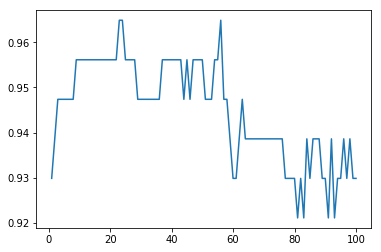

In [53]:
plt.plot(k_list, accuracies)
plt.show()

Let's add some labels and a title. Set the x-axis label to `"k"` using `plt.xlabel()`. Set the y-axis label to `"Validation Accuracy"`. Set the title to `"Breast Cancer Classifier Accuracy"`.


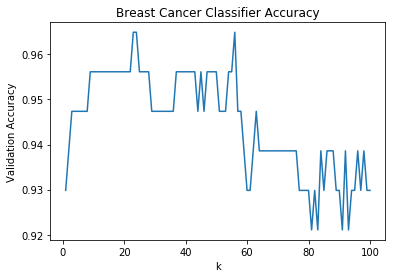

In [57]:
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

Great work! If you want to play around with this more, try changing the `random_state` parameter when making the training set and validation set. This will change which points are in the training set and which are in the validation set.
Ideally, the graph will look the same no matter how you split up the training set and test set. This data set is fairly small, so there is slightly more variance than usual.
Submit your completed script.py file when you are ready.


In [65]:
tts = train_test_split(breast_cancer_data.data, breast_cancer_data.target, train_size = 0.8, random_state = 1)
training_data = tts[0]
validation_data = tts[1]
training_labels = tts[2]
validation_labels = tts[3]

In [66]:
accuracies = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))

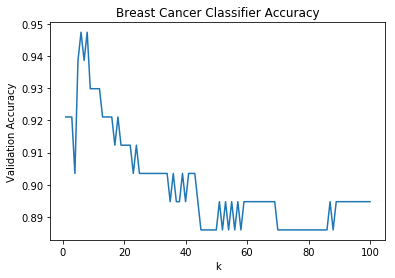

In [67]:
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()